# Chapter 2. End-to-End Machine Learning Project

Here are the steps we will follow:

1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for ML algorithms.
5. Select a model and train.
6. Present the solution.
7. Launch, monitor, and maintain the system.

## Working with real data

Some popular open data repositories include:

- [UC Irvine ML Repository](http://archive.ics.uci.edu/ml/index.php)
- [Kaggle datasets](https://www.kaggle.com/datasets)
- [Amazon's AWS datasets](https://registry.opendata.aws)
- [Wikipedias list of machine learning datasets](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research
- [this](https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public) Quora.com questoins
- the [Datasets subreddit](https://www.reddit.com/r/datasets)

There are a few "meta-portals":

- http://dataportals.org/
- http://opendatamonitor.eu/
- http://quandl.com/

This example analysis will use the California Housing Prices dataset from the StatLib repository based on data from the 1990 CA census.
The goal is the create a model to predict the median housing price in any district.

### Download the data

In [80]:
import os, tarfile
from six.moves import urllib
import pandas as pd
import numpy as np

DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = 'assets/homl/housing'
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    ''' Download and extract housing data.'''
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    '''Load in housing data as a pandas DataFrame.'''
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

# Download the data.
# fetch_housing_data()

# Loading the data as a pandas DataFrame.
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [81]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [82]:
# Number of missing data points per column.
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [83]:
# The values of 'ocean_proximity' are categorical.
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [84]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a28bded10>,
      dtype=object)

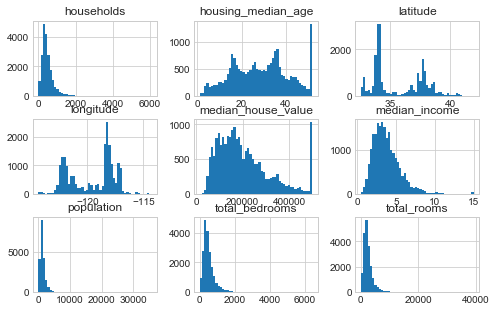

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

# Some good default values to use for my Jupyter notebook.
plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(8, 5), facecolor='white')

housing.hist(bins=50)

A few things to note about the data:

1. The 'median_income' has been scaled and capped to a range of 0.5 and 15.
2. The 'housing_median_age' and 'median_house_value' have been capped, the latter potentially being a problem because that data is the predicted value.
3. The attributes have different scales (discussed later).
4. Many of the histograms have a long tail - a good sign to transform the data, depending on the model.

### Create a test set



In [86]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing data.
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=0)

The author wasnted to ensure that the median income was properly sampled in the training and testing data.
Therefore, he created a categorical variable and used `sklearn.model_selection.StratifiedShuffleSplit()` to split the data into training and testing sets while maintaining equal distributions of this category.

In [87]:
housing['income_cat'] = np.ceil(housing.median_income / 1.5)
housing['income_cat'].where(housing.income_cat < 5.0, 5.0, inplace=True)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [88]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [89]:
# Compare splits
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [90]:
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [91]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [92]:
# Remove unneeded columns.
strat_test_set.drop(['income_cat'], axis=1, inplace=True)
strat_train_set.drop(['income_cat'], axis=1, inplace=True)

## Discover and visualize the data to gain insights

In [93]:
# A copy of the training data to play around with.
housing = strat_train_set.copy()

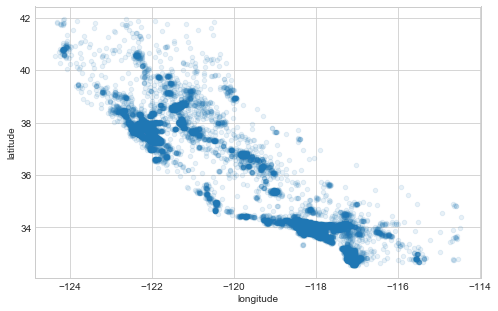

In [94]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)


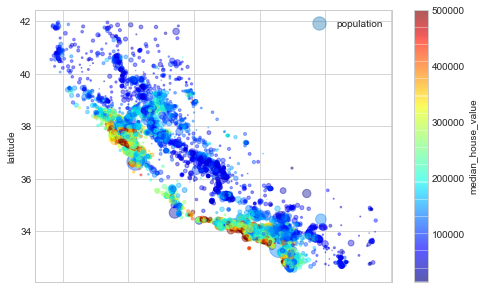

In [95]:
housing.plot(kind='scatter',
             x = 'longitude',
             y = 'latitude',
             alpha = 0.4,
             s=housing.population/100,
             label='population',
             c='median_house_value',
             cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

In [96]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924903,-0.108097,0.041547,0.065183,0.096933,0.051827,-0.013645,-0.043236
latitude,-0.924903,1.000000,0.010784,-0.034359,-0.064436,-0.106834,-0.069613,-0.081262,-0.145570
housing_median_age,-0.108097,0.010784,1.000000,-0.359036,-0.317509,-0.293215,-0.300756,-0.113458,0.107144
total_rooms,0.041547,-0.034359,-0.359036,1.000000,0.929552,0.853612,0.918026,0.196382,0.137469
total_bedrooms,0.065183,-0.064436,-0.317509,0.929552,1.000000,0.874315,0.980162,-0.009282,0.053544
population,0.096933,-0.106834,-0.293215,0.853612,0.874315,1.000000,0.903795,0.003431,-0.023797
households,0.051827,-0.069613,-0.300756,0.918026,0.980162,0.903795,1.000000,0.011840,0.069177
median_income,-0.013645,-0.081262,-0.113458,0.196382,-0.009282,0.003431,0.011840,1.000000,0.688883
median_house_value,-0.043236,-0.145570,0.107144,0.137469,0.053544,-0.023797,0.069177,0.688883,1.000000


In [97]:
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688883
total_rooms           0.137469
housing_median_age    0.107144
households            0.069177
total_bedrooms        0.053544
population           -0.023797
longitude            -0.043236
latitude             -0.145570
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a292fc0d0>,
      dtype=object)

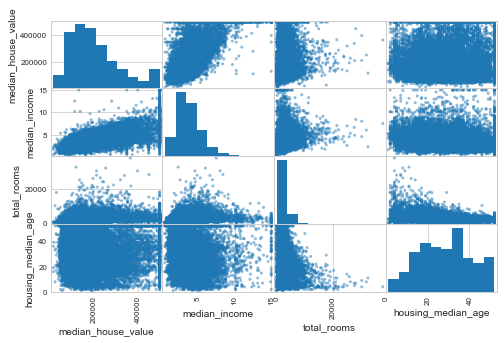

In [98]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes])

From the above scatter matrix, the most promizing attribute seems to be median income.
The following plot is a closer look.

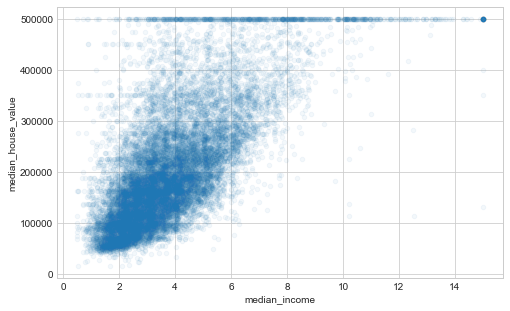

In [99]:
housing.plot(kind='scatter',
             x='median_income',
             y='median_house_value',
             alpha=0.05)

The actual numbers of rooms and bedrooms are not very useful.
Instead, we want the average number of rooms and bedrooms per house.

In [100]:
housing['rooms_per_household'] = housing.total_rooms / housing.households
housing['bedrooms_per_room'] = housing.total_bedrooms / housing.households
housing['population_per_household'] = housing.population / housing.households

# Check the correlations again.
corr_matrix = housing.corr()
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688883
rooms_per_household         0.157620
total_rooms                 0.137469
housing_median_age          0.107144
households                  0.069177
total_bedrooms              0.053544
population                 -0.023797
population_per_household   -0.026888
longitude                  -0.043236
bedrooms_per_room          -0.048998
latitude                   -0.145570
Name: median_house_value, dtype: float64

## Prepare the data for machine learning algorithms

It is important to have a functional flow for this preparation such the transofrmations are easily reproducible and extendible.
Also, the same transformations will need to be done on the input data when the model is in use.
Finally, it allows for faster prototyping.

To begin, we reset the training data and separated the labels.

In [101]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

### Data cleaning

We need to address the missing data in the `'total_bedrooms'` column; the following are the three options:

1. Remove the data points.
2. Do not use the feature, atl all.
3. Set the missing points to some other value (0, the average)

If option 3 is taken, make sure to save the value for filling in the test data, too.

Scikit-learn inlcudes the [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) class to impute missing values.
Here, it is used to fill in missing values with the median value.

In [102]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer.fit(housing.drop('ocean_proximity', axis=1))
imputer

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [103]:
imputer.statistics_ == housing.drop('ocean_proximity', axis=1).median().values

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [104]:
X = imputer.transform(housing.drop('ocean_proximity', axis=1))
X

array([[-1.1787e+02,  3.3860e+01,  2.8000e+01, ...,  2.1970e+03,
         5.0900e+02,  3.4856e+00],
       [-1.2157e+02,  3.9130e+01,  3.0000e+01, ...,  4.1300e+02,
         8.8000e+01,  1.5694e+00],
       [-1.1905e+02,  3.4400e+01,  5.0000e+01, ...,  1.0790e+03,
         2.5700e+02,  2.6991e+00],
       ...,
       [-1.1830e+02,  3.4250e+01,  4.4000e+01, ...,  8.5900e+02,
         2.9200e+02,  4.5833e+00],
       [-1.2191e+02,  3.7310e+01,  4.6000e+01, ...,  1.3730e+03,
         5.9000e+02,  4.7287e+00],
       [-1.1830e+02,  3.4090e+01,  2.9000e+01, ...,  3.9060e+03,
         1.1020e+03,  2.1927e+00]])

### Handling text and categorical attributes

The ocean proximity feature must be turned into a numerical "dummy" variable.
This can be accomplished using the [LabelEncoder]() (**NEED TO INSERT LINK**) transformer from Scikit-Learn.

In [105]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing.ocean_proximity
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 1, 0, ..., 0, 0, 0])

In [106]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

The problem with this implementation of dummy variables is that there is no intrinsic order in ocean proximity to maintain.
Therefore, we should use the [OneHotEncoder]() transformer (or the pandas `pd.get_dummies(s)` function), instead.

In [107]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [108]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [109]:
# Using the pandas method.
pd.get_dummies(housing.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10275,1,0,0,0,0
20601,0,1,0,0,0
20138,1,0,0,0,0
18028,1,0,0,0,0
16289,0,1,0,0,0
...,...,...,...,...,...
6358,0,1,0,0,0
618,0,0,0,1,0
3407,1,0,0,0,0
17590,1,0,0,0,0


Finally, we can encode a categorical feature into a dummy matrix directly using the [LabelBinarizer]() **NEED LINK** transformer.

In [110]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing.ocean_proximity)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

### Custom transformers

Custom tranformers can be made for Scikit-Learn in order to seamlessly fit in standard functionalities and pipelines.
All that a class needs are three methods: `fit()`, `transform()` and `fit_transform()`.
(Subclassing from TransformerMixin will bring in the last method in for free.)
Here is an example transformer that adds some features we did earlier.

In [111]:
from sklearn.base import BaseEstimator, TransformerMixin

# Indices of columns for `CombinedAttributesAdder`.
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    '''Add some useful features to housing data.'''

    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [112]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attributes = attr_adder.transform(housing.values)
housing_extra_attributes

array([[-117.87, 33.86, 28.0, ..., '<1H OCEAN', 4.50294695481336,
        4.31630648330059],
       [-121.57, 39.13, 30.0, ..., 'INLAND', 5.0227272727272725,
        4.693181818181818],
       [-119.05, 34.4, 50.0, ..., '<1H OCEAN', 4.809338521400778,
        4.198443579766537],
       ...,
       [-118.3, 34.25, 44.0, ..., '<1H OCEAN', 4.938356164383562,
        2.941780821917808],
       [-121.91, 37.31, 46.0, ..., '<1H OCEAN', 5.172881355932203,
        2.3271186440677964],
       [-118.3, 34.09, 29.0, ..., '<1H OCEAN', 2.9446460980036298,
        3.544464609800363]], dtype=object)

### Feature scaling

The two most common scaling tactics are *minmax scaling* (or *normalization*) and *standardization*.
The first is linearly scaling the data to exist within the range of 0 to 1 and the Scikit-Learn transformer for this is [MinMaxScaler]() **NEED LINK**.
The latter is transforming the data to have mean 0 and standard deviation 1 and the appropriate Scikit-Learn transformer is [StandardScaler]() **NEED LINK**.

### Tansformation pipelines

The [Pipeline]() **NEED LINK** class can perform a sequence of transformations.
Below is a small example.

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scalar', StandardScaler())
])

housing_num_tr = num_pipline.fit_transform(
    housing.drop('ocean_proximity', axis=1))

We also have the ocean proximity unordered categorical data that needs a separate pipeline.
Scikit-Learn has a [FeatureUnion]() **LINK NEEDED** class that can take multiple pipelines, run them in parallel, and re-combine the output into a single data structure.
First, we need to make a wrapper for selecting pandas DataFrame columns as a transformer class for Scikit-Learn.

In [114]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    '''
    A Scikit-Learn transformer for selecting columns of
    a pandas DataFrame.
    '''
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

In [115]:
# This implementation was taken from this PR on sklearn.
# https://github.com/scikit-learn/scikit-learn/pull/7375/files#diff-1e175ddb0d84aad0a578d34553f6f9c6
class MyLabelBinarizer(LabelBinarizer):
    '''
    An alternative to Scikit-Learn's LabelBinarizer because it is not 
    working in my pipe line.
    '''
    
    def fit(self, X, y=None):
         super(MyLabelBinarizer, self).fit(X)
    
    def transform(self, X, y=None):
         return super(MyLabelBinarizer, self).transform(X)
    
    def fit_transform(self, X, y=None):
         return super(MyLabelBinarizer, self).fit(X).transform(X)

In [116]:
# Column names for numerical and categorical features of housing data.
numerical_attr = list(housing.drop('ocean_proximity', axis=1))
categorical_attr = ['ocean_proximity']

# A pipline for the numerical features of housing data.
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(numerical_attr)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

# A pipeline for the categorical 'ocean_proximity'.
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(categorical_attr)),
    ('label_binarizer', MyLabelBinarizer()),
])

# A full pipeline for preparing the housing data.
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [117]:
# Run the pipeline.
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.84450121, -0.82473693, -0.04853356, ...,  0.        ,
         0.        ,  0.        ],
       [-1.00168564,  1.64070891,  0.11081943, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.25571729, -0.5721106 ,  1.70434932, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.62994436, -0.64228458,  1.22629035, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17133524,  0.78926462,  1.38564334, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.62994436, -0.71713683,  0.03114293, ...,  0.        ,
         0.        ,  0.        ]])

In [118]:
housing_prepared.shape

(16512, 16)

## Select and train a model

### Training and evaluating on the training set

The first model tried was a linear regression.

In [119]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

That is all that is required to get a linear regression model.
Below, it is manually tested on a few data points.

In [120]:
# Get the first 5 values to play with.
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

# Transform the selected data for input into the model.
some_data_prepared = full_pipeline.transform(some_data)

# What would be predicted by the linear regression model.
lin_reg.predict(some_data_prepared)

array([172713.58885788,  43130.16935351, 195014.22158132, 268919.62476372,
        44875.4698183 ])

In [121]:
# Actual values.
some_labels.values

array([142800.,  57900., 181300., 245300.,  73900.])

In [122]:
# Difference between actual and predicted divided by the actual value.
(some_labels.values - lin_reg.predict(some_data_prepared)) / some_labels.values

array([-0.20947891,  0.25509207, -0.0756438 , -0.09628873,  0.39275413])

We can compare the predicted values to the real values of the training data by calculating the root mean squared error (RMSE).

In [123]:
from sklearn.metrics import mean_squared_error

def root_mean_squared_error(actual_val, predicted_val):
    """Calculate the RMSE of actual and predicted values."""
    return np.sqrt(mean_squared_error(actual_val, predicted_val))

housing_predictions = lin_reg.predict(housing_prepared)
lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)
lin_rmse

68284.24083518104

To attain a better prediction, we will use a more complicated model, a decision tree regression model.

In [124]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [125]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_rmse = root_mean_squared_error(housing_labels, housing_predictions)
tree_rmse

0.0

With a RMSE of 0, it is likely that the decision tree is overfitting.
We can fix this by using cross-validation.

### Betting evaluation using CV

It is a fairly straightforward process for running CV in Scikit-Learn.

In [126]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,
                         housing_prepared,
                         housing_labels,
                         scoring="neg_mean_squared_error",
                         cv=10)
scores

array([-5.09225911e+09, -5.15375088e+09, -4.98208947e+09, -4.95614622e+09,
       -4.97668140e+09, -4.79071660e+09, -5.22910147e+09, -5.34359896e+09,
       -4.50367302e+09, -4.96588182e+09])

In [127]:
rmse_scores = np.sqrt(-scores)
rmse_scores

array([71360.06664306, 71789.62931735, 70583.91789879, 70399.90212568,
       70545.59803748, 69215.00270135, 72312.52637449, 73099.92448992,
       67109.41078134, 70469.01320245])

In [128]:
rmse_scores.mean()

70688.49915719285

In [129]:
rmse_scores.std()

1589.3335950525825

The decision tree did not perform very well.
We could see improvements by using an ensemble of them: a random forest regression model.

In [130]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [131]:
forest_scores = cross_val_score(forest_reg,
                               housing_prepared,
                               housing_labels,
                               scoring='neg_mean_squared_error',
                               cv=10)
forest_scores

array([-2.44544512e+09, -2.86294130e+09, -2.35392547e+09, -2.49363092e+09,
       -2.64240278e+09, -2.34490264e+09, -2.43276184e+09, -2.60129380e+09,
       -2.54586615e+09, -2.66949272e+09])

In [132]:
forest_rmse = np.sqrt(-forest_scores)
forest_rmse

array([49451.4420742 , 53506.46034054, 48517.26981405, 49936.26855454,
       51404.307023  , 48424.19479902, 49323.03558077, 51002.88029496,
       50456.57685432, 51667.13386124])

In [133]:
forest_rmse.mean()

50368.956919664095

In [134]:
forest_rmse.std()

1494.808550480117

The random forest seems to be a better option than the linear regression or the decision tree.

The author suggests trying out a few other models to generate a short-list (2-5) types of models to dive deeper into.

## Fine-tune your model